# Zadanie I - Regresja nieliniowa

**1.** Zaczniemy od modelu liniowego, który zbudowaliśmy na ostatnich zajęciach.

W razie problemów, tutaj poprawnie działająca wersja: https://colab.research.google.com/drive/13MqFLEjUsSfWT8emrx7d1h-Y0GI727dF?usp=sharing

**2.** Zamiast definiować model jako model = nn.Linear(1,1), zdefiniujmy klasę:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as nF
import torch

In [4]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
      nn.Linear(1,7),
      nn.ReLU(),
      nn.Linear(7,7),
      nn.ReLU(),
      nn.Linear(7,1)
    )
  def forward(self, x):
    return self.net(x)

Epoch [500/3000], Loss: 147.3177
Epoch [1000/3000], Loss: 25.6787
Epoch [1500/3000], Loss: 42.7996
Epoch [2000/3000], Loss: 3.0068
Epoch [2500/3000], Loss: 19.6871
Epoch [3000/3000], Loss: 6.5331
Parameter containing:
tensor([[ 0.5148],
        [-0.1234],
        [ 1.2994],
        [-0.1328],
        [ 1.4362],
        [-0.0283],
        [-0.8380]], requires_grad=True)
Parameter containing:
tensor([-1.3667, -0.6198, -8.1143,  1.6993, -1.7326,  0.4503, -0.0795],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1824, -0.1489, -0.3085, -0.0143, -0.3075,  0.1738, -0.1711],
        [ 0.7733,  0.2676,  3.0359, -1.1306,  0.5943, -0.1787, -0.0142],
        [ 0.2046,  0.1158,  0.1512, -0.2422, -0.2043,  0.2316, -0.0373],
        [-0.1852, -0.2853,  0.2149, -0.1112, -0.0390, -0.1031, -0.0380],
        [ 0.3477,  0.1431,  2.8818,  0.4368,  1.4629,  0.0347,  0.0098],
        [-0.0151,  0.1301, -0.0066, -0.2697, -0.2362,  0.1539,  0.2739],
        [-0.0133, -0.1671, -0.1468,  0.0793, -0

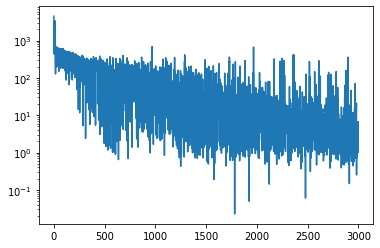

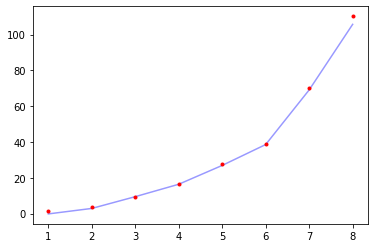

In [6]:
X = torch.tensor([1., 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 3.8, 9.3, 16.4, 27.5, 38.8, 70, 110.2])
X = X.reshape(8,1)
f = f.reshape(8,1)

train_data = TensorDataset(X, f)

batch_size = 4
train_dl = DataLoader(train_data, batch_size, shuffle = True)
loss_fn = nF.mse_loss
loss_history = []

model = model()

opt = torch.optim.SGD(model.parameters(), lr=1e-4)
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    for epoch in range(num_epochs):
        
        for x_pull,y_pull in train_dl:
            pred = model(x_pull)
            loss = loss_fn(pred, y_pull)
            loss.backward()
            opt.step()
            opt.zero_grad()

        loss_history.append(loss.item())
        if (epoch+1) % 500 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

N = 3000
fit(N, model, loss_fn, opt, train_dl)
preds = model(X)

fig = plt.figure()
ax = plt.axes()
for param in model.parameters():
  print(param)
ax.plot(np.arange(0,N,1),loss_history)
ax.set_yscale('log')
fig2 = plt.figure()
ax = plt.axes()
ax.plot(X, preds.detach().numpy(), alpha = 0.4, color = 'blue');
ax.plot(X, f.detach().numpy(), '.', color = 'red')
plt.show()

**3.** Zamieńmy zbiór wartości tak, aby nie był już liniowy.

**4.** Aby model miał wystarczająco dużo swobody do dopasowania się, wprowadźmy przynajmniej jedną warstwę ukrytą. Przedzielmy warstwy funkcją aktywacji, aby model mógł dopasować się do nieliniowego kształtu.

**5.** Uzyskaj dobre dopasowanie nieliniowej funkcji z punktu **3**.

**6.** Za pomocą uzyskanego modelu, spróbuj odseparować poniższy zbiór danych.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from matplotlib import style

In [7]:
class model2(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
      nn.Linear(2,10),
      nn.ReLU(),
      nn.Linear(10,10),
      nn.ReLU(),
      nn.Linear(10,1)
    )
  def forward(self, x):
    return self.net(x)

In [9]:
X2 = torch.tensor(X2).float()

y2 = torch.tensor(y2).float()

X2 = X2.reshape(1000,2)
y2 = y2.reshape(1000,1)

train_data2 = TensorDataset(X2, y2)

batch_size = 16
train_dl2 = DataLoader(train_data2, batch_size, shuffle = True)
loss_fn2 = nF.mse_loss
loss_history = []

model2 = model2()

opt2 = torch.optim.SGD(model2.parameters(), lr=1e-3)

Epoch [500/1000], Loss: 0.0064
Epoch [1000/1000], Loss: 0.0044


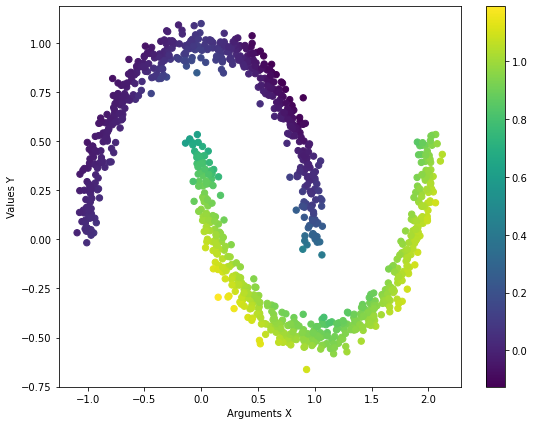

In [10]:
plt.rcParams["figure.figsize"] = (9,7)
X, y = make_moons(n_samples = 1000, noise = 0.05) #noise define a spread
N = 1000
fit(N, model2, loss_fn2, opt2, train_dl2)
preds2 = model2(X2)

plt.scatter(X2.detach().numpy()[:, 0], X2.detach().numpy()[:, 1], s = 40, c = preds2.detach().numpy())
plt.colorbar()
plt.xlabel("Arguments X")
plt.ylabel("Values Y")
plt.show()

# Zadanie II - Regresja logistyczna na przykładzie klasyfikacji obrazów

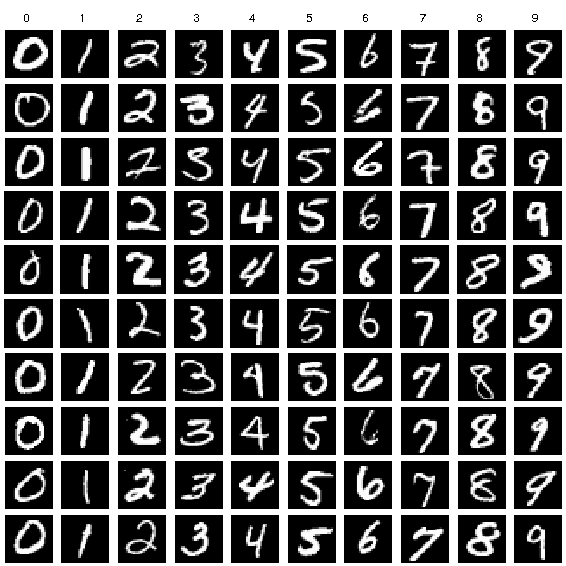

In [11]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [12]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Label: 5


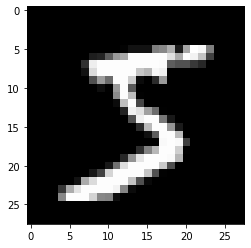

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Musimy przekonwertować obrazki na coś zrozumiałego dla maszyny:

In [14]:
import torchvision.transforms as transforms

In [15]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

tensor, label = dataset[10]
print(tensor.shape, label)

torch.Size([1, 28, 28]) 3


I podzielić zbiór na uczący i testujący:

In [16]:
from torch.utils.data import random_split
train_ds, test_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(test_ds)
from torch.utils.data import DataLoader
batch_size = 100
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size)
loss_fn = nF.binary_cross_entropy

## Zadanie do wykonania
1. Wytrenuj model tak, aby nauczył się rozpoznawać liczby.
Przydatna może być funkcja softmax, która formatuje wyjście naszego modelu do wektora (10-elementowego, ponieważ mamy 10 cyfr), wskazującego prawdopodobieństwo każdej cyfry. Użyj funkcji trenującej binary_crossentropy.
2. Wykres loss w funkcji epoch.
3. Wyznacz accuraccy (cel - 99%, akceptowalne - 88%) 

In [17]:
class model3(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
      nn.Linear(784,500),
      nn.ReLU(),
      nn.Linear(500,500),
      nn.ReLU(),
      nn.Linear(500,500),
      nn.ReLU(),
      nn.Linear(500,10),
      nn.Softmax()
    )
  def forward(self, x):
    return self.net(x)

In [48]:
loss_history = []
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        for images, labels in train_dl:
            pred = model(images.reshape (batch_size, 784))
            y_pull = np.zeros((batch_size,10))

            for i in range(batch_size):
              y_pull[i][labels[i]] = 1 

            y_pull = torch.tensor(y_pull).float()
            loss = loss_fn(pred, y_pull)
            loss.backward()
            opt.step()
            opt.zero_grad()

        loss_history.append(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [49]:
loss_history = []
model = model3()
opt = torch.optim.SGD(model.parameters(), lr=1e-1)
N = 70
fit(N, model, loss_fn, opt, train_loader)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/70], Loss: 0.3111
Epoch [2/70], Loss: 0.1292
Epoch [3/70], Loss: 0.0725
Epoch [4/70], Loss: 0.0506
Epoch [5/70], Loss: 0.0874
Epoch [6/70], Loss: 0.0391
Epoch [7/70], Loss: 0.0407
Epoch [8/70], Loss: 0.0507
Epoch [9/70], Loss: 0.0295
Epoch [10/70], Loss: 0.0169
Epoch [11/70], Loss: 0.0256
Epoch [12/70], Loss: 0.0393
Epoch [13/70], Loss: 0.0280
Epoch [14/70], Loss: 0.0190
Epoch [15/70], Loss: 0.0280
Epoch [16/70], Loss: 0.0221
Epoch [17/70], Loss: 0.0165
Epoch [18/70], Loss: 0.0114
Epoch [19/70], Loss: 0.0107
Epoch [20/70], Loss: 0.0309
Epoch [21/70], Loss: 0.0254
Epoch [22/70], Loss: 0.0103
Epoch [23/70], Loss: 0.0245
Epoch [24/70], Loss: 0.0065
Epoch [25/70], Loss: 0.0200
Epoch [26/70], Loss: 0.0193
Epoch [27/70], Loss: 0.0149
Epoch [28/70], Loss: 0.0141
Epoch [29/70], Loss: 0.0059
Epoch [30/70], Loss: 0.0056
Epoch [31/70], Loss: 0.0078
Epoch [32/70], Loss: 0.0060
Epoch [33/70], Loss: 0.0169
Epoch [34/70], Loss: 0.0084
Epoch [35/70], Loss: 0.0040
Epoch [36/70], Loss: 0.0023
E

In [50]:
torch.save(model, "model")
print(len(train_loader))

500


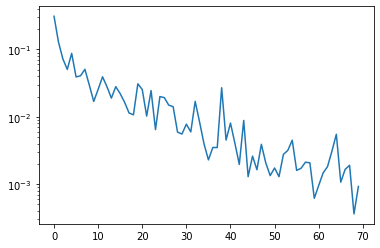

In [51]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.arange(0, N, 1), loss_history)
ax.set_yscale('log')
plt.show()

In [52]:
accuracy_cnt = 0
for images, labels in test_loader:
    pred = model(images.reshape(batch_size, 784))
    y_pull = np.zeros((batch_size,10))

    for i in range(batch_size):
      y_pull[i][labels[i]] = 1 

    for i in range(batch_size):
      if np.argmax(y_pull[i]) ==  np.argmax(pred[i].detach().numpy()):
        accuracy_cnt+=1

accuracy = (accuracy_cnt / len(test_loader))
print("Accuracy: ",accuracy,"%")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy:  97.74 %
